# RFM Customer Segmentation & Cohort Analysis Project

Welcome to "RFM Customer Segmentation & Cohort Analysis Project". This is the first project of the Capstone Project Series, which consists of 4 different project that contain different scenarios.

This is a project which you will learn what is RFM? And how to apply RFM Analysis and Customer Segmentation using K-Means Clustering. Also you will improve your Data Cleaning, Data Visualization and Exploratory Data Analysis capabilities. On the other hand you will create Cohort and Conduct Cohort Analysis. 

Before diving into the project, please take a look at the determines and project structure.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind K-Means Clustering.



## Project Structures

- Data Cleaning & Exploratory Data Analysis
- RFM Analysis
- Customer Segmentation
- Applying K-Means Clustering
- Create Cohort and Conduct Cohort Analysis

## Tasks

#### 1. Data Cleaning & Exploratory Data Analysis

- Import Modules, Load Data & Data Review
- Follow the Steps Below

    *i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.*
    
    *ii. What does the letter "C" in the invoiceno column mean?*
    
    *iii. Handling Missing Values*
    
    *iv. Clean the Data from the Noise and Missing Values*
    
    *v. Explore the Orders*
    
    *vi. Explore Customers by Country*
    
    *vii. Explore the UK Market*
    
#### 2. RFM Analysis

- Follow the steps below

   *i. Import Libraries*
   
   *ii. Review "df_uk" DataFrame (the df_uk what you create at the end of the Task 1)*
   
   *iii. Calculate Recency*
   
   *iv. Calculate Frequency*
   
   *v. Calculate Monetary Values*
   
   *vi. Create RFM Table*

#### 3. Customer Segmentation with RFM Scores
- Calculate RFM Scoring

    *i. Creating the RFM Segmentation Table*
 
- Plot RFM Segments

#### 4. Applying K-Means Clustering
- Data Pre-Processing and Exploring

    *i. Define and Plot Feature Correlations*
 
    *ii. Visualize Feature Distributions*
 
    *iii. Data Normalization*

- K-Means Implementation

    *i. Define Optimal Cluster Number (K) by using "Elbow Method" and "Silhouette Analysis"*
 
    *ii. Visualize the Clusters*
 
    *iii. Assign the label*
 
    *iv. Conclusion*
 
#### 5. Create Cohort and Conduct Cohort Analysis
- Future Engineering

    *i. Extract the Month of the Purchase*
 
    *ii. Calculating time offset in Months i.e. Cohort Index*
 
- Create 1st Cohort: User Number & Retention Rate 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 1 using seaborn and matplotlib*

- Create 2nd Cohort: Average Quantity Sold 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 2 using seaborn and matplotlib*

- Create 3rd Cohort: Average Sales

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 3 using seaborn and matplotlib*
    
- **Note: There may be sub-tasks associated with each task, you will see them in order during the course of the work.**


# 1. Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
sns.set_style("whitegrid")

In [3]:
df=pd.read_excel('Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
df[df.Quantity<0]['Quantity']

141       -1
154       -1
235      -12
236      -24
237      -24
          ..
540449   -11
541541    -1
541715    -5
541716    -1
541717    -5
Name: Quantity, Length: 10624, dtype: int64

In [10]:
df[df.Quantity<0]['Quantity'].describe()

count    10624.000000
mean       -45.607210
std       1092.214216
min     -80995.000000
25%        -10.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: Quantity, dtype: float64

### i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

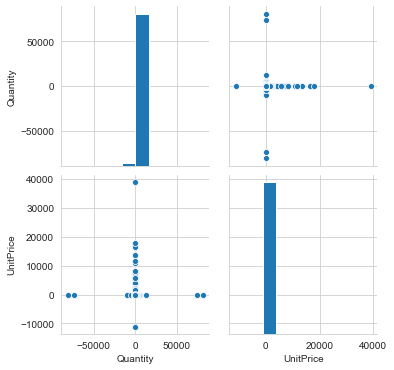

In [11]:
sns.pairplot(df.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country'], axis=1));

We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

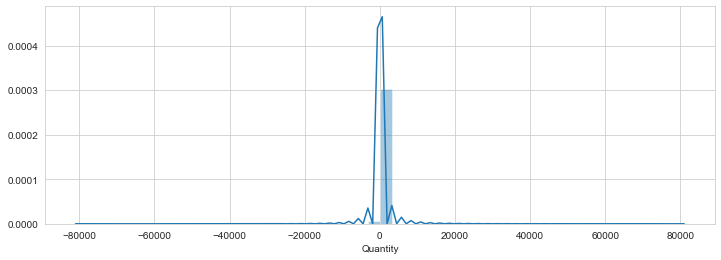

In [12]:
plt.figure(figsize=(12,4))
sns.distplot(df.Quantity);

### ii. What does the letter "C" in the InvoiceNo column mean?

In [13]:
df.InvoiceNo.value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
564861        1
556725        1
556730        1
C562577       1
C554001       1
Name: InvoiceNo, Length: 25900, dtype: int64

If the invoice number starts with the letter "C", it means the order was cancelled. Or those who abandon their order.

In [14]:
df[df.Quantity<0].InvoiceNo.count()

10624

When we filter canceled orders by Quantity> 0 or filter non-canceled orders by Quantity <0 nothing returns, this confirms that negative values mean the order was canceled. So lets find out how many orders were cancelled?

When we filter canceled orders by Quantity> 0 or filter non-canceled orders by Quantity <0 nothing returns, this confirms that negative values mean the order was canceled. So lets find out how many orders were cancelled

In [15]:
df[df["InvoiceNo"].str.contains("C", na=False)].InvoiceNo.count()

9288

#### 9288 or about 36% of the orders were cancelled. Looking deeper into why these orders were cancelled may prevent future cancellations. Now let's find out what a negative UnitPrice means.


In [16]:
df.groupby('InvoiceNo').nunique().sum()

InvoiceNo       25900
StockCode      531225
Description    529586
Quantity       128618
InvoiceDate     25943
UnitPrice      204729
CustomerID      22190
Country         25900
dtype: int64

In [17]:
df[df.UnitPrice==0].count()

InvoiceNo      2515
StockCode      2515
Description    1061
Quantity       2515
InvoiceDate    2515
UnitPrice      2515
CustomerID       40
Country        2515
dtype: int64

In [18]:
df[df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [19]:
#df['InvoiceNum']=df.InvoiceNo.apply(lambda x: x[-6:])
#df[['InvoiceNum', 'InvoiceNo']].head(3)

In [20]:
#df[df['cancellation']==1][['InvoiceNum', 'InvoiceNo', 'cancellation']].sample(5)

In [21]:
### iii. Handling Missing Values

In [22]:
df.CustomerID.isnull().sum()

135080

Since the customer ID's are missing, lets assume these orders were not made by the customers already in the data set because those customers already have ID's. 

We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. 


### iv. Clean the Data from the Noise and Missing Values

In [23]:
df.shape

(541909, 8)

In [24]:
df2=df.dropna()

In [25]:
df2.shape

(406829, 8)

In [26]:
#df2.InvoiceNum=df2.InvoiceNum.astype('int64')

In [27]:
df2.CustomerID=df2.CustomerID.astype('int64')

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


### v. Explore the Orders

1. Find the unique number of InvoiceNo  per customer

In [29]:
df2.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False)

CustomerID
17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
13391       1
16579       1
13366       1
17763       1
17846       1
Name: InvoiceNo, Length: 4372, dtype: int64

In [30]:
df2.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
        ... 
13828      1
13829      1
16123      1
13833      1
15300      1
Name: InvoiceNo, Length: 4372, dtype: int64

In [31]:
#df2[df2.CustomerID==14911]['InvoiceNo'].nunique()

2. What's the average number of unqiue items per order or per customer?

In [32]:
#number of unqiue items per order
df2.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].nunique().sort_values(ascending=False)

CustomerID  InvoiceNo
14096       576339       541
            579196       529
            580727       525
            578270       439
            573576       434
                        ... 
15611       C569940        1
13098       C542244        1
            580533         1
15615       539051         1
12346       541431         1
Name: StockCode, Length: 22190, dtype: int64

In [33]:
#average number of unqiue items per order
df2.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].nunique().mean()

17.87656602073006

In [34]:
df2.groupby(["CustomerID", "InvoiceNo"])["Description"].nunique().mean()

17.87187922487607

What's the average number of unqiue items per order or per customer

In [35]:
#average number of unqiue items per customer
df2.groupby('CustomerID')['StockCode'].nunique().mean()

61.21111619396157

3. Let's see how this compares to the number of unique products per customer.

In [36]:
#number of unqiue items per customer
df2.groupby('CustomerID')['StockCode'].nunique().sort_values(ascending=False)

CustomerID
14911    1794
12748    1769
17841    1331
14096    1121
14298     884
         ... 
15802       1
15753       1
17616       1
15668       1
12346       1
Name: StockCode, Length: 4372, dtype: int64

### vi. Explore Customers by Country

1. What's the total revenue per country?

In [37]:
df2['TotalPrice'] = df2['UnitPrice']*df2['Quantity']

In [38]:
df2.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

Country
United Kingdom          6.767873e+06
Netherlands             2.846615e+05
EIRE                    2.502852e+05
Germany                 2.216982e+05
France                  1.967128e+05
Australia               1.370773e+05
Switzerland             5.573940e+04
Spain                   5.477458e+04
Belgium                 4.091096e+04
Sweden                  3.659591e+04
Japan                   3.534062e+04
Norway                  3.516346e+04
Portugal                2.905981e+04
Finland                 2.232674e+04
Channel Islands         2.008629e+04
Denmark                 1.876814e+04
Italy                   1.689051e+04
Cyprus                  1.294629e+04
Austria                 1.015432e+04
Singapore               9.120390e+03
Poland                  7.213140e+03
Israel                  6.994250e+03
Greece                  4.710520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
Unspecified             2.667070e+03
Malta                   2.5054

2. Visualize number of customer per country

In [39]:
df2.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Denmark                    9
Australia                  9
Netherlands                9
Cyprus                     8
Japan                      8
Sweden                     8
Poland                     6
Unspecified                4
Israel                     4
Greece                     4
USA                        4
Canada                     4
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Czech Republic             1
Singapore                  1
Lithuania                  1
Saudi Arabia               1
Brazil                     1
RSA                        1
Icelan

In [40]:
df2.groupby('Country')['CustomerID'].nunique().sum()

4380

In [41]:
df2.CustomerID.nunique()
# It seems 8 customers have shopped from more than 1 country (4380-4372=8)

4372

In [42]:
df2.groupby('CustomerID')['Country'].nunique().sort_values(ascending=False).head(10)

CustomerID
12394    2
12429    2
12455    2
12457    2
12417    2
12422    2
12370    2
12431    2
14323    1
14321    1
Name: Country, dtype: int64

In [43]:
df2.groupby('CustomerID')['Country'].nunique().sort_values(ascending=False).head(8).keys()

Int64Index([12394, 12429, 12455, 12457, 12417, 12422, 12370, 12431], dtype='int64', name='CustomerID')

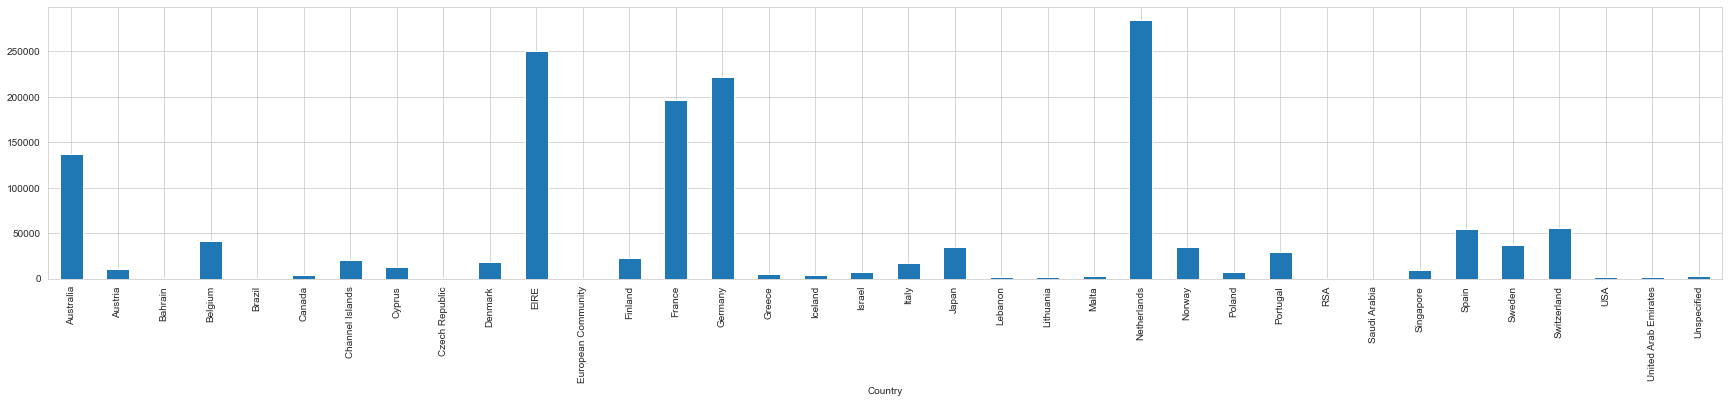

In [44]:
# without UK
plt.figure(figsize=(30,5))
df2[df2.Country!='United Kingdom'].groupby("Country").TotalPrice.sum().plot(kind='bar');

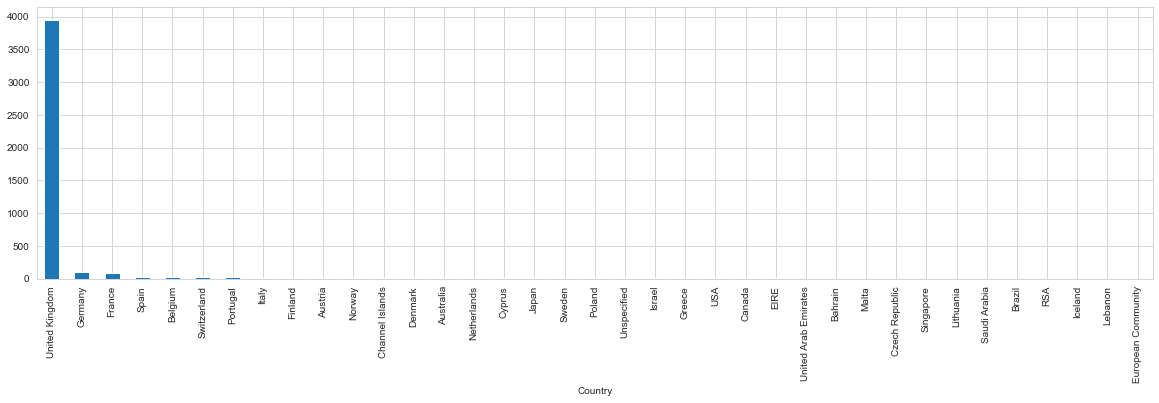

In [45]:
plt.figure(figsize=(20,5))
df2.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).plot(kind='bar');

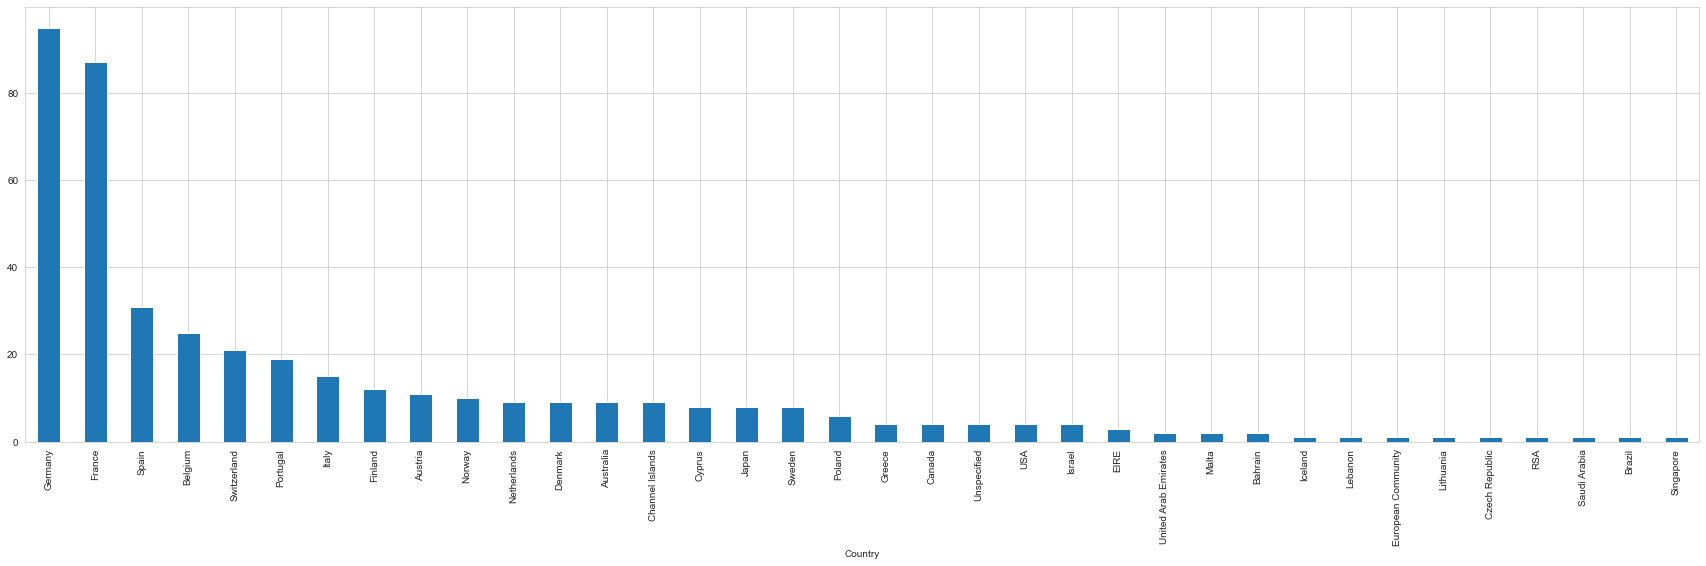

In [46]:
# without UK
plt.figure(figsize=(30,8))
df2[df2.Country!='United Kingdom'].groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).plot(kind='bar');

3. Visualize total cost per country

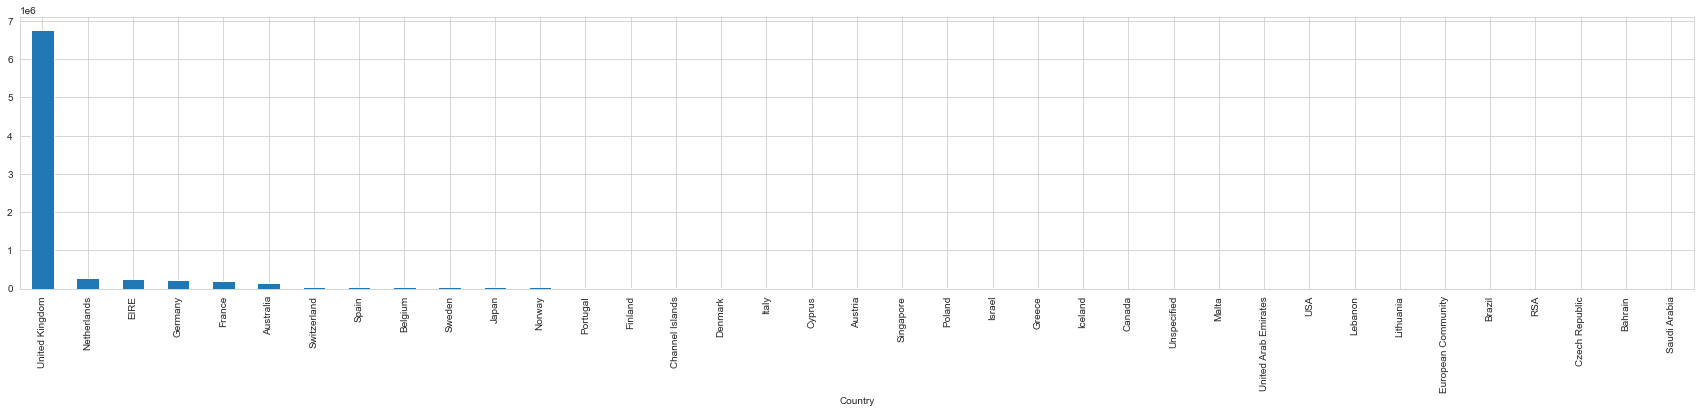

In [47]:
plt.figure(figsize=(30,5))
df2.groupby("Country").TotalPrice.sum().sort_values(ascending=False).plot(kind='bar');

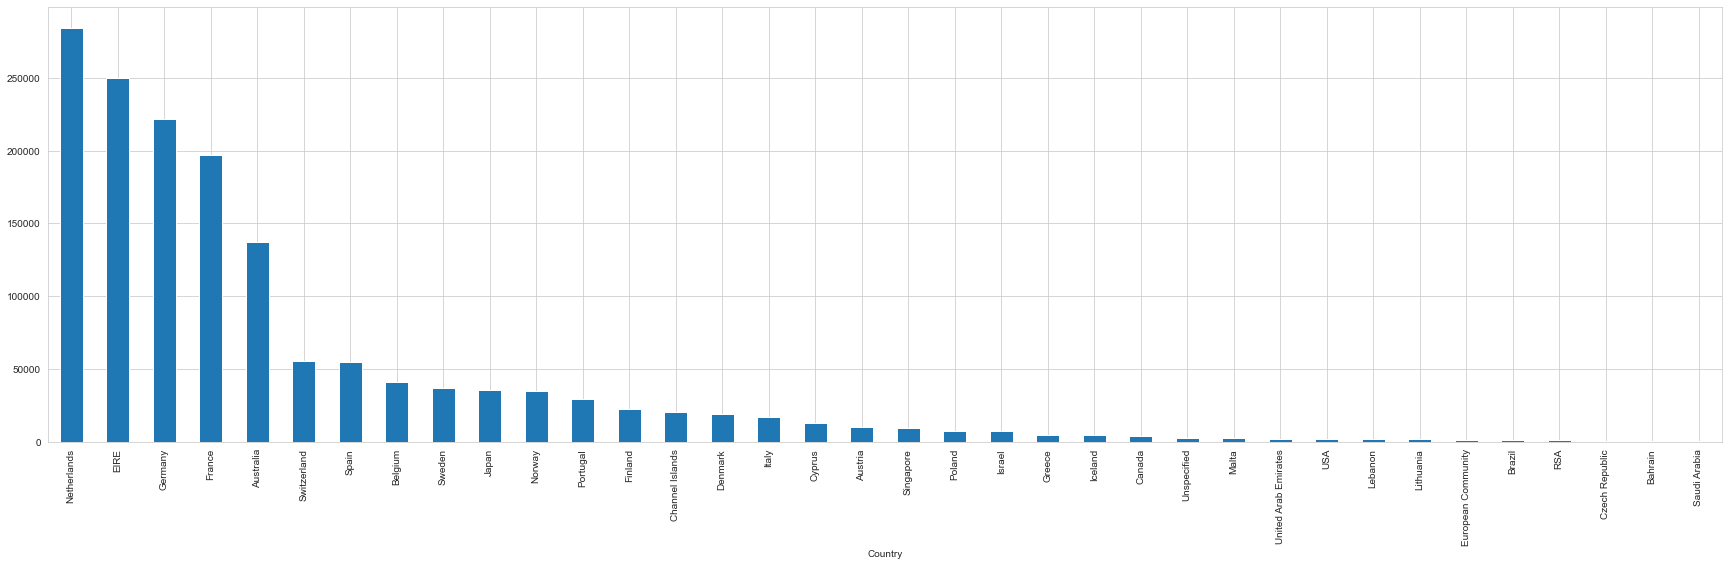

In [48]:
# without UK
plt.figure(figsize=(30,8))
df2[df2.Country!='United Kingdom'].groupby("Country").TotalPrice.sum().sort_values(ascending=False).plot(kind='bar');

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### vii. Explore the UK Market


1. Create df_uk DataFrame

In [49]:
df_uk=df2[(df2.Country=='United Kingdom')&(df2.Quantity>=0)]

In [50]:
df_uk.shape

(354345, 9)

In [51]:
df_uk.Quantity.describe()

count    354345.000000
mean         12.048913
std         190.428127
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

2. What are the most popular products that are bought in the UK?

In [52]:
df_uk['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    1940
JUMBO BAG RED RETROSPOT               1464
REGENCY CAKESTAND 3 TIER              1426
ASSORTED COLOUR BIRD ORNAMENT         1333
PARTY BUNTING                         1308
LUNCH BAG RED RETROSPOT               1147
LUNCH BAG  BLACK SKULL.               1049
SET OF 3 CAKE TINS PANTRY DESIGN      1020
PAPER CHAIN KIT 50'S CHRISTMAS         982
HEART OF WICKER SMALL                  952
Name: Description, dtype: int64

### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

### i. Review df_uk DataFrame

In [53]:
print('Min:{}; Max:{}'.format(min(df_uk.InvoiceDate), max(df_uk.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:49:00


### iii. Recency: Days since last purchase
To calculate the recency values, follow these steps in order:

1. To calculate recency, we need to choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.
2. Create a new column called Date which contains the invoice date without the timestamp
3. Group by CustomerID and check the last date of purchase
4. Calculate the days since last purchase
5. Drop Last_Purchase_Date since we don't need it anymore
6. Plot RFM distributions

1. Choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.

In [54]:
df_uk.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [55]:
df_uk.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [56]:
now=dt.date(2012,1,1)

In [57]:
print(now)

2012-01-01


2. Create a new column called Date which contains the invoice date without the timestamp

In [58]:
df_uk['Date'] = df_uk['InvoiceDate'].dt.date 

In [59]:
df_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [60]:
import datetime
now = datetime.datetime(2012,1,1)

In [61]:
df_rfm = df_uk.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})

# Rename the columns 
df_rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)
df_rfm.sample(5)

,Recency,Frequency,Monetary
CustomerID,,,
17081,47,64,290.16
16976,289,2,251.52
14745,134,69,1220.26
15192,141,51,1044.32
13538,65,25,1280.85


In [62]:
rfm=df_rfm.copy()

In [63]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,113.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,22.000000,1.000000,0.000000
25%,39.000000,17.000000,300.040000
50%,72.000000,41.000000,651.820000
75%,164.000000,99.000000,1575.890000
max,395.000000,7847.000000,259657.300000


# 3. Customer Segmentation with RFM Scores

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as [Customer Segmentation](https://clevertap.com/blog/rfm-analysis/).
Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. Some of the common ways of segmenting customers are based on their Recency-Frequency-Monatory values, their demographics like gender, region, country, etc, and some of their business-crafted scores. You will use Recency-Frequency-Monatory values for this case.

In this section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

## Calculate RFM Scoring

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.
<br>
<br>
**Note**: Data can be assigned into more groups for better granularity, but we will use 4 in this case.

1. Divide the df_rfm into quarters

### i. Creating the RFM Segmentation Table

1. Create two functions, one for Recency and one for Frequency and Monetary. For Recency, customers in the first quarter should be scored as 4, this represents the highest Recency value. Conversely, for Frequency and Monetary, customers in the last quarter should be scored as 4, representing the highest Frequency and Monetary values.

In [64]:
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [65]:
def MFscore(x,p,d):
    if x > d[p][0.75]:
        return 4
    elif x > d[p][0.50]:
        return 3
    elif x > d[p][0.25]: 
        return 2
    else:
        return 1

2. Score customers from 1 to 4 by applying the functions you have created. Also create separate score column for each value. 

In [66]:
quantiles = df_rfm[['Recency']].quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
df_rfm['R'] = df_rfm['Recency'].apply(Rscore, args=('Recency',quantiles))

In [67]:
quantiles = df_rfm[['Frequency']].quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
df_rfm['F'] = df_rfm['Frequency'].apply(MFscore, args=('Frequency',quantiles,))

In [68]:
quantiles = df_rfm[['Monetary']].quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
df_rfm['M'] = df_rfm['Monetary'].apply(MFscore, args=('Monetary',quantiles))

3. Now that scored each customer, you'll combine the scores for segmentation.

In [69]:
df_rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,347,1,77183.60,1,1,4
12747,24,103,4196.01,4,4,4
12748,22,4596,33719.73,4,4,4
12749,25,199,4090.88,4,4,4
12820,25,59,942.34,4,3,3


In [70]:
df_rfm['RFM_Scores'] = df_rfm.R.map(str) + df_rfm.F.map(str) + df_rfm.M.map(str)

In [71]:
df_rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Scores
CustomerID,,,,,,,
12346,347,1,77183.60,1,1,4,114
12747,24,103,4196.01,4,4,4,444
12748,22,4596,33719.73,4,4,4,444
12749,25,199,4090.88,4,4,4,444
12820,25,59,942.34,4,3,3,433


4. Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Level

In [72]:
df_rfm['RFM_Sum'] = df_rfm[['R','F','M']].sum(axis=1)

In [73]:
df_rfm3=df_rfm.copy()

In [74]:
score_labels = ['Low', 'Mid Low', 'Middle', 'High', "Top Class"]
score_groups = pd.qcut(df_rfm.RFM_Sum, q = 5, labels = score_labels)
df_rfm['RFM_Level'] = score_groups.values

df_rfm.sample()

,Recency,Frequency,Monetary,R,F,M,RFM_Scores,RFM_Sum,RFM_Level
CustomerID,,,,,,,,,
14489,229,30,463.38,1,2,2,122,5,Low


In [75]:
score_labels = ['Low', 'Middle', 'High']
score_groups = pd.qcut(df_rfm.RFM_Sum, q = 3, labels = score_labels)
df_rfm3['RFM_Level'] = score_groups.values

df_rfm3.sample()

,Recency,Frequency,Monetary,R,F,M,RFM_Scores,RFM_Sum,RFM_Level
CustomerID,,,,,,,,,
13070,214,9,228.8,1,1,1,111,3,Low


In [76]:
rfm_level_agg = df_rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
print(rfm_level_agg)

          Recency Frequency Monetary      
             mean      mean     mean count
RFM_Level                                 
Low         212.1      14.9    259.4  1175
Mid Low     118.5      28.3    827.6   425
Middle       91.1      47.1    826.8   801
High         61.5      96.2   1858.4   766
Top Class    34.9     282.9   6055.7   754


5. Calculate average values for each RFM_Level, and return a size of each segment 

In [77]:
df_rfm.groupby('RFM_Scores').agg({
'Recency': ['mean','min','max','count'],
'Frequency': ['mean','min','max','count'],
'Monetary': ['mean','min','max','count'] }).round(1).head(3)

Recency                 Frequency               Monetary         \
              mean  min  max count      mean min max count     mean    min   
RFM_Scores                                                                   
111          279.9  165  395   343       8.1   1  17   343    152.3    3.8   
112          275.4  165  395   104      10.6   1  17   104    377.1  300.9   
113          262.3  172  358    23       7.7   1  17    23    899.0  652.8   

                          
               max count  
RFM_Scores                
111          298.5   343  
112          635.7   104  
113         1308.5    23

In [78]:
df_rfm.groupby('RFM_Scores')['Recency'].count().sort_values(ascending=False)

RFM_Scores
444    409
111    343
344    186
122    180
211    168
      ... 
314      7
414      5
142      4
124      4
441      1
Name: Recency, Length: 61, dtype: int64

## Plot RFM Segments

1. Create your plot and resize it.

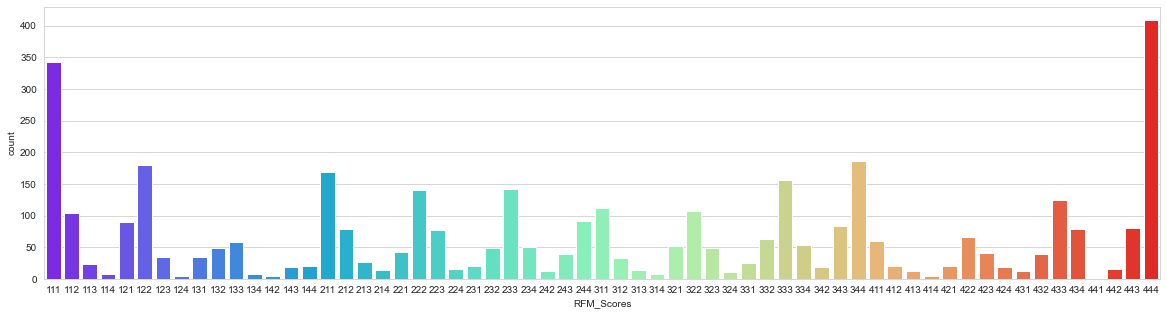

In [79]:
plt.figure(figsize=(20,5))
sns.countplot(x=df_rfm.RFM_Scores, palette="rainbow");

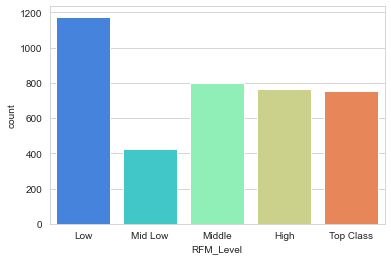

In [80]:
sns.countplot(x=df_rfm.RFM_Level, palette="rainbow");

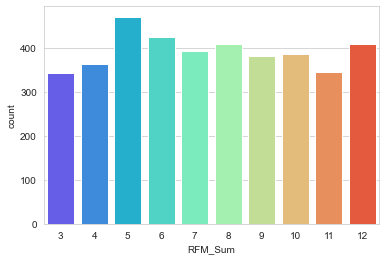

In [81]:
sns.countplot(x=df_rfm.RFM_Sum, palette="rainbow");

In [82]:
df_rfm.RFM_Scores

CustomerID
12346    114
12747    444
12748    444
12749    444
12820    433
        ... 
18280    111
18281    111
18282    411
18283    444
18287    334
Name: RFM_Scores, Length: 3921, dtype: object

Using customer segmentation categories found [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales) we can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

2. How many customers do we have in each segment?

In [83]:
df_rfm.groupby('RFM_Scores')['Recency'].count().sort_values(ascending=False)

RFM_Scores
444    409
111    343
344    186
122    180
211    168
      ... 
314      7
414      5
142      4
124      4
441      1
Name: Recency, Length: 61, dtype: int64

# 4. Create Cohort & Conduct Cohort Analysis
Cohort Analysis is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source. Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

* How much effective was a marketing campaign held in a particular time period?
* Did the strategy employ to improve the conversion rates of Customers worked?
* Should I focus more on retention rather than acquiring new customers?
* Are my customer nurturing strategies effective?
* Which marketing channels bring me the best results?
* Is there a seasonality pattern in Customer behavior?
* Along with various performance measures/metrics for your organization.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:

* Invoice Data      
* CustomerID     
* Price       
* Quantity        

## Feature Engineering
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

The following steps will performed to generate the Cohort Chart of Retention Rate:

* Month Extraction from InvioceDate column
* Assigning Cohort to Each Transaction
* Assigning Cohort Index to each transaction
* Calculating number of unique customers in each Group of (ChortDate,Index)
* Creating Cohort Table for Retention Rate
* Creating the Cohort Chart using the Cohort Table

In [135]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [136]:
df_uk.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Date'],
      dtype='object')

In [152]:
df_new=df_uk[['InvoiceDate', 'CustomerID', 'InvoiceNo', 'Quantity', 'UnitPrice', 'TotalPrice']]
df_new.sample(2)

,InvoiceDate,CustomerID,InvoiceNo,Quantity,UnitPrice,TotalPrice
98405,2011-02-22 16:15:00,13077,544678,1,7.65,7.65
194580,2011-05-18 11:28:00,14583,553657,1,3.95,3.95


In [154]:
# Month Extraction from InvioceDate column

def get_month(x):return datetime.datetime(x.year, x.month, 1)
df_new['InvoiceMonth'] = df_new['InvoiceDate'].apply(get_month)
grouping = df_new.groupby('CustomerID')['InvoiceMonth']
df_new['CohortMonth'] = grouping.transform('min')
df_new.sample(3)

,InvoiceDate,CustomerID,InvoiceNo,Quantity,UnitPrice,TotalPrice,InvoiceMonth,CohortMonth
388527,2011-10-10 14:37:00,16549,570442,4,1.25,5.0,2011-10-01,2011-01-01
30397,2010-12-14 14:15:00,16919,538863,4,2.10,8.4,2010-12-01,2010-12-01
467511,2011-11-14 15:51:00,16478,576352,12,1.25,15.0,2011-11-01,2011-10-01


In [157]:
# Assigning Cohort Index to each transaction

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [158]:
invoice_year, invoice_month, _ = get_date_int(df_new, 'InvoiceMonth') 
cohort_year, cohort_month, _ = get_date_int(df_new, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df_new['CohortIndex'] = years_diff * 12 + months_diff + 1
df_new.sample(3)

,InvoiceDate,CustomerID,InvoiceNo,Quantity,UnitPrice,TotalPrice,InvoiceMonth,CohortMonth,CohortIndex
61756,2011-01-18 13:05:00,18118,541485,1,1.25,1.25,2011-01-01,2010-12-01,2
377647,2011-10-05 09:31:00,12971,569559,96,1.65,158.40,2011-10-01,2010-12-01,11
454962,2011-11-10 12:37:00,14096,575607,2,0.83,1.66,2011-11-01,2011-08-01,4


In [160]:
# Creating Cohort Table for Retention Rate

grouping = df_new.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
print(cohort_counts)

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12-01   815.0  289.0  263.0  304.0  293.0  323.0  291.0  278.0  289.0   
2011-01-01   358.0   76.0   93.0   84.0  119.0   99.0   90.0   87.0  108.0   
2011-02-01   340.0   64.0   66.0   97.0   98.0   86.0   87.0   96.0   90.0   
2011-03-01   419.0   64.0  109.0   83.0   94.0   69.0  111.0   96.0  119.0   
2011-04-01   277.0   58.0   56.0   60.0   56.0   61.0   61.0   73.0   20.0   
2011-05-01   256.0   48.0   44.0   44.0   53.0   58.0   68.0   23.0    NaN   
2011-06-01   214.0   38.0   31.0   51.0   51.0   69.0   21.0    NaN    NaN   
2011-07-01   169.0   30.0   33.0   39.0   47.0   18.0    NaN    NaN    NaN   
2011-08-01   141.0   32.0   32.0   34.0   17.0    NaN    NaN    NaN    NaN   
2011-09-01   276.0   63.0   83.0   32.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   324.0   79.0   36.0    NaN    NaN    NaN    NaN    

In [161]:
# Retention

cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,35.5,32.3,37.3,36.0,39.6,35.7,34.1,35.5,39.9,36.7,49.7,26.7
2011-01-01,100.0,21.2,26.0,23.5,33.2,27.7,25.1,24.3,30.2,32.7,35.5,12.0,NaN
2011-02-01,100.0,18.8,19.4,28.5,28.8,25.3,25.6,28.2,26.5,30.6,7.4,NaN,NaN
2011-03-01,100.0,15.3,26.0,19.8,22.4,16.5,26.5,22.9,28.4,9.1,NaN,NaN,NaN
2011-04-01,100.0,20.9,20.2,21.7,20.2,22.0,22.0,26.4,7.2,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.8,17.2,17.2,20.7,22.7,26.6,9.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.8,14.5,23.8,23.8,32.2,9.8,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.8,19.5,23.1,27.8,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.7,22.7,24.1,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Creating the Cohort Chart using the Cohort Table

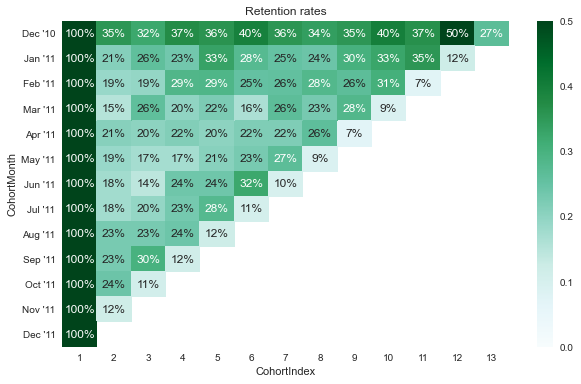

In [162]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.0,vmax = 0.5, cmap = 'BuGn', yticklabels=month_list)
plt.show()

#### Average Quantity by Monthly Cohorts

In [164]:
grouping = df_new.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex',values='Quantity')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.2,12.8,13.8,13.7,13.2,13.2,14.1,13.6,16.0,16.0,16.5,12.2,14.3
2011-01-01,17.8,9.5,9.4,15.0,10.0,10.8,13.5,10.7,10.7,8.6,8.4,9.8,NaN
2011-02-01,10.9,13.8,16.0,12.1,12.3,11.9,13.8,13.6,10.9,12.4,13.8,NaN,NaN
2011-03-01,9.6,11.4,13.3,10.1,14.1,12.8,13.0,13.9,11.0,9.5,NaN,NaN,NaN
2011-04-01,10.0,10.1,9.7,11.9,11.7,8.2,9.8,9.2,7.4,NaN,NaN,NaN,NaN
2011-05-01,10.5,9.3,14.7,12.8,11.0,8.3,10.7,122.1,NaN,NaN,NaN,NaN,NaN
2011-06-01,9.5,14.6,11.9,12.6,9.7,8.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.1,15.0,6.5,8.0,5.7,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.3,6.0,5.0,5.9,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


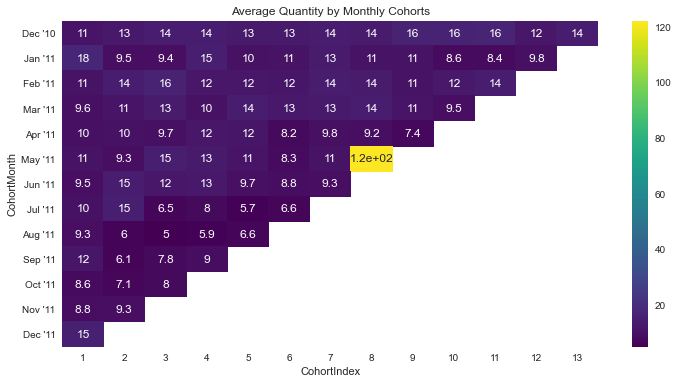

In [168]:
plt.figure(figsize=(12,6))
plt.title('Average Quantity by Monthly Cohorts')
sns.heatmap(average_quantity, annot=True, cmap='viridis', yticklabels=month_list)
plt.show()

In [171]:
sales_data = grouping['TotalPrice'].mean()
sales_data = sales_data.reset_index()
sales_volume = sales_data.pivot(index='CohortMonth', columns='CohortIndex',values='TotalPrice')
sales_volume.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,20.8,22.3,23.8,23.5,20.1,25.6,25.7,23.7,26.1,31.2,30.8,21.3,24.3
2011-01-01,26.3,18.6,15.3,27.9,18.5,19.0,24.0,17.6,17.7,16.9,17.7,18.5,NaN
2011-02-01,16.8,19.8,19.2,19.1,17.5,16.0,21.2,22.8,18.0,21.8,23.9,NaN,NaN
2011-03-01,16.6,20.1,22.7,17.6,20.6,18.3,20.6,19.7,16.2,12.8,NaN,NaN,NaN
2011-04-01,16.5,20.0,19.2,18.6,18.8,13.9,14.7,15.0,11.3,NaN,NaN,NaN,NaN
2011-05-01,17.9,16.8,21.7,21.1,18.6,13.4,16.4,251.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,22.7,15.0,19.5,16.4,13.2,13.1,12.6,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.7,24.7,10.1,12.7,9.2,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,15.0,13.0,12.0,15.6,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


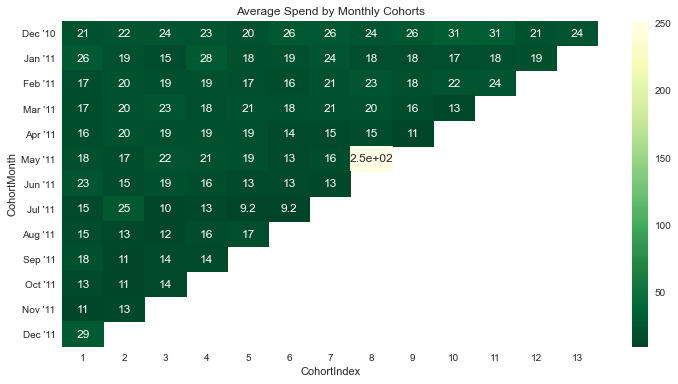

In [188]:
plt.figure(figsize=(12,6))
plt.title('Average Spend by Monthly Cohorts')
sns.heatmap(sales_volume, annot=True, cmap='YlGn_r', yticklabels=month_list)
plt.show()

# 5. Applying K-Means Clustering

Now that we have our customers segmented into 6 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

## Data Pre-Processing and Exploring

In [84]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,347,1,77183.60
12747,24,103,4196.01
12748,22,4596,33719.73
12749,25,199,4090.88
12820,25,59,942.34


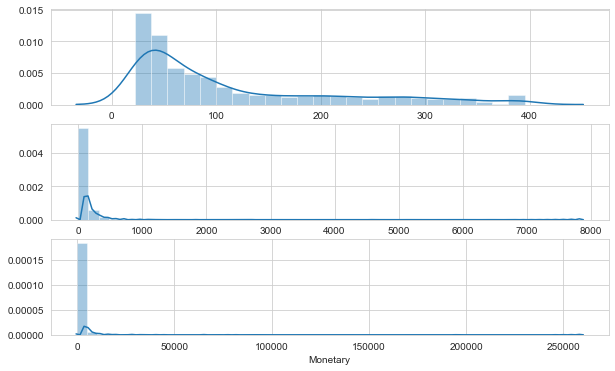

In [85]:
plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency)
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency)
plt.subplot(3, 1, 3); sns.distplot(rfm.Monetary)
plt.show()

### i. Define and Plot Feature Correlations

Create Heatmap and evaluate the results 

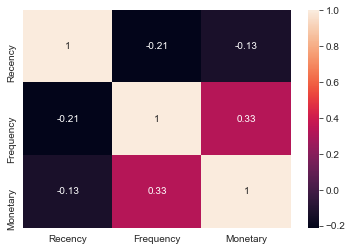

In [86]:
sns.heatmap(rfm.corr(), annot=True);

### ii. Visualize Feature Distributions

To get a better understanding of the dataset, you can costruct a scatter matrix of each of the three features in the RFM data.

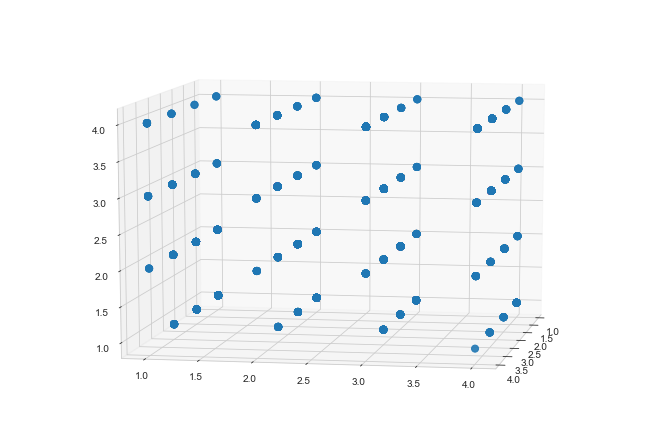

In [87]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] =(9,6)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_rfm.iloc[:,4],df_rfm.iloc[:,3],df_rfm.iloc[:,5],s = 50, cmap = "rainbow")
#ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);
#for angle in range(0, 360):
ax.view_init(10, 10);

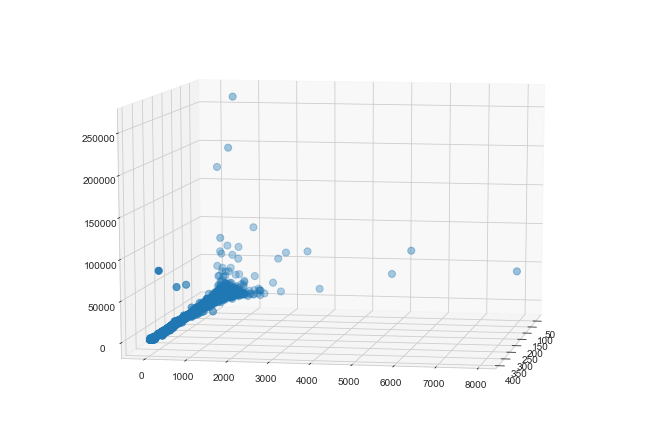

In [88]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] =(9,6)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_rfm.iloc[:,0],df_rfm.iloc[:,1],df_rfm.iloc[:,2],s = 50, cmap = "rainbow")
#ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);
#for angle in range(0, 360):
ax.view_init(10, 10);

In [89]:
df_rfm2= df_rfm[(df_rfm.Monetary<20000) & (df_rfm.Frequency<600)]

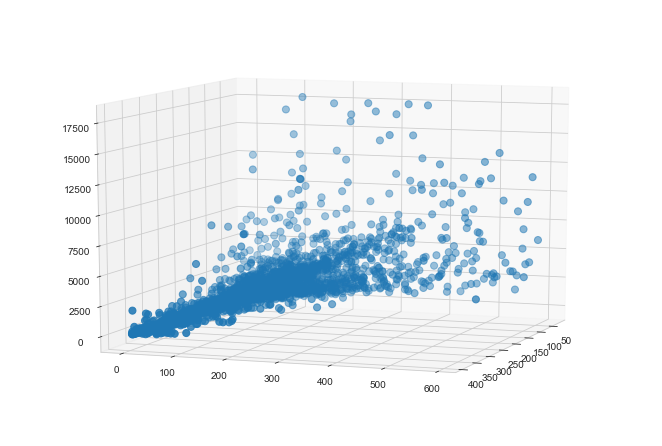

In [90]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] =(9,6)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_rfm2.iloc[:,0],df_rfm2.iloc[:,1],df_rfm2.iloc[:,2],s = 50)
#ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);
#for angle in range(0, 360):
ax.view_init(10, 20);

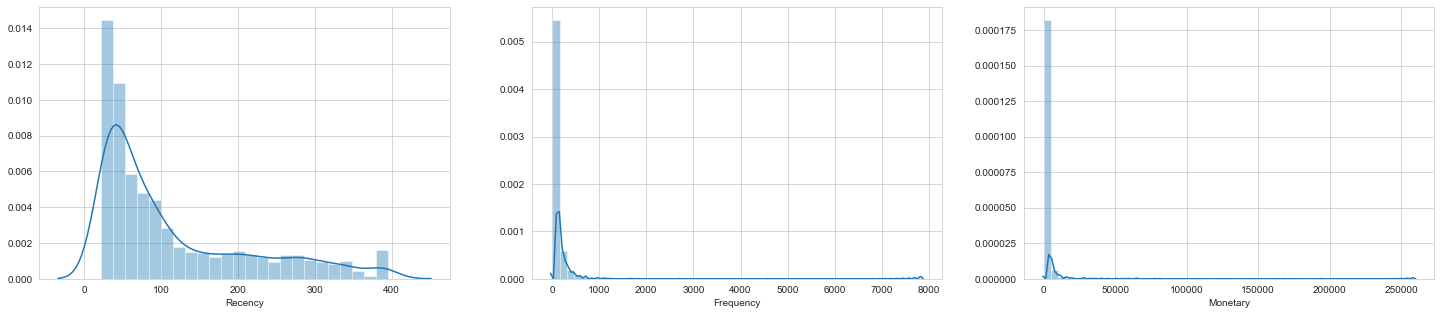

In [91]:
f, ax = plt.subplots(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.distplot(df_rfm['Recency'])
plt.subplot(1, 3, 2); sns.distplot(df_rfm['Frequency'])
plt.subplot(1, 3, 3); sns.distplot(df_rfm['Monetary'])

### iii. Data Normalization

1. You can use the logarithm method to normalize the values in a column.

In [92]:
rfm_log = np.log(rfm +1)

2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

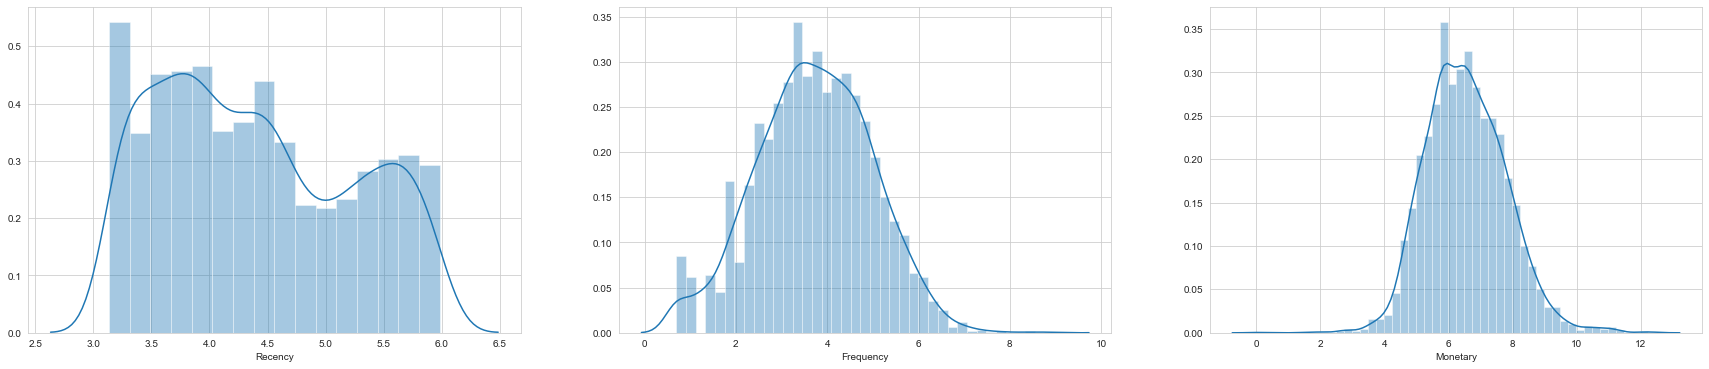

In [93]:
f, ax = plt.subplots(figsize=(30, 6))
plt.subplot(1, 3, 1); sns.distplot(rfm_log['Recency'])
plt.subplot(1, 3, 2); sns.distplot(rfm_log['Frequency'])
plt.subplot(1, 3, 3); sns.distplot(rfm_log['Monetary']);

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)

rfm_norm = scaler.transform(rfm_log)

rfm_norm = pd.DataFrame(data=rfm_norm, index=rfm.index, columns=rfm.columns)

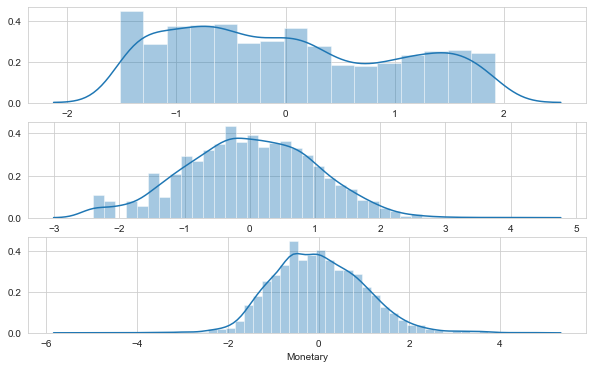

In [95]:
plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1); sns.distplot(rfm_norm.Recency)
plt.subplot(3, 1, 2); sns.distplot(rfm_norm.Frequency)
plt.subplot(3, 1, 3); sns.distplot(rfm_norm.Monetary)
plt.show()

## K-Means Implementation

For k-means, you have to set k to the number of clusters you want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
<br>
<br>
**Note**: K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

In [96]:
from pyclustertend import hopkins
hopkins(rfm_norm, rfm_norm.shape[0])

0.08021281655593913

In [97]:
rfm_norm.shape

(3921, 3)

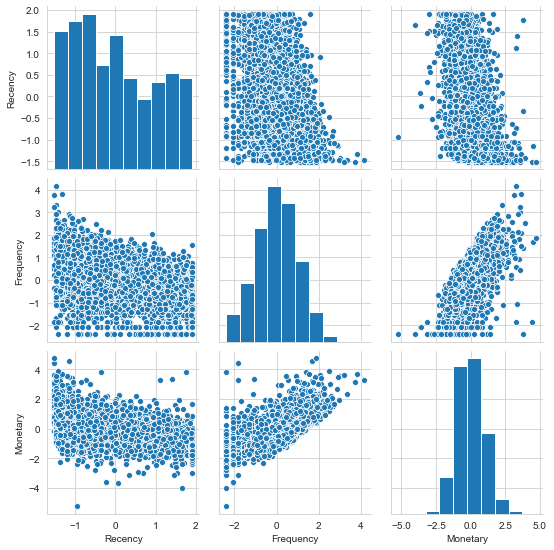

In [98]:
sns.pairplot(rfm_norm);

### i. Define the Optimal Number of Clusters

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

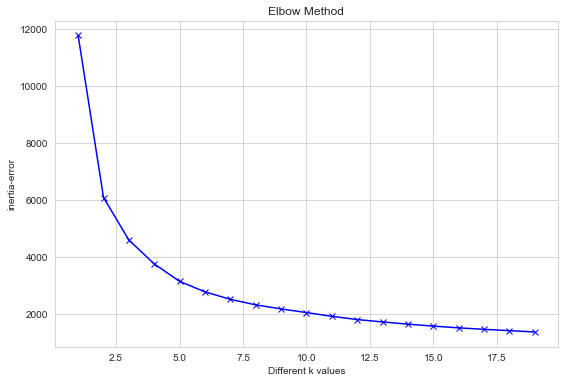

In [100]:
ssd = []
 
K = range(1,20)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(rfm_norm)
    ssd.append(model.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method");

In [101]:
# Here k=3 or k=5

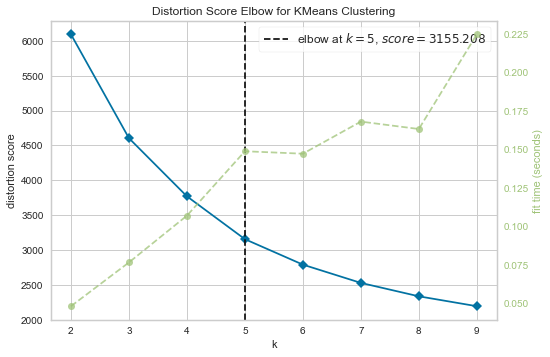

In [102]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(rfm_norm)
visu.poof();

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [103]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7]

for num_clusters in range_n_clusters:
    
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_norm)
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(rfm_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.39905625071335576
For n_clusters=3, the silhouette score is 0.3267323352336368
For n_clusters=4, the silhouette score is 0.3246518443156487
For n_clusters=5, the silhouette score is 0.2997606469660355
For n_clusters=6, the silhouette score is 0.2910096590471535
For n_clusters=7, the silhouette score is 0.27678981765793126


### ii. Model Fitting

Fit the K-Means Algorithm with the optimal number of clusters you decided and save the model to disk.

### for k=5

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [105]:
model5=KMeans(n_clusters = 5)
model5.fit(rfm_norm)
y_k5 = model5.predict(rfm_norm)

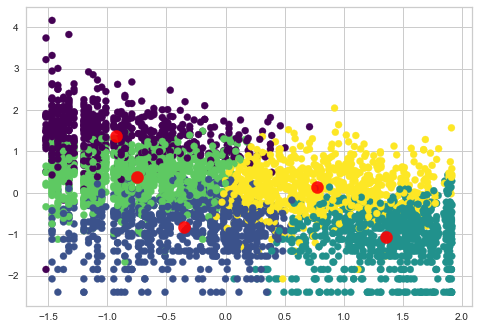

In [106]:
plt.scatter(rfm_norm.iloc[:,0], rfm_norm.iloc[:,1], c=model5.labels_, cmap="viridis")
centers = model5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.9);

### for k=3

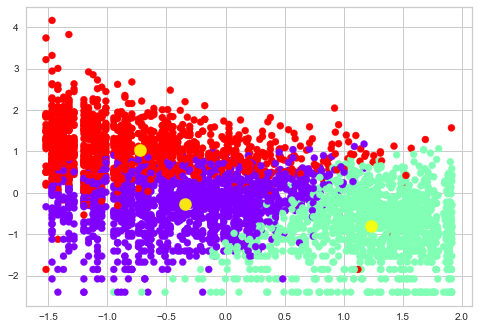

In [107]:
model3=KMeans(n_clusters =3)
model3.fit(rfm_norm)
plt.scatter(rfm_norm.iloc[:,0], rfm_norm.iloc[:,1], c=model3.labels_, cmap="rainbow");
centers = model3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=150, alpha=0.9);

### iii. Visualize the Clusters

1. Create a scatter plot and select cluster centers

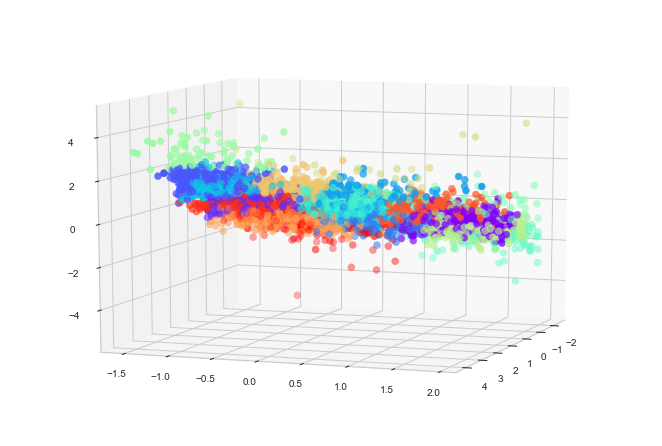

In [108]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] =(9,6)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfm_norm.iloc[:,1],rfm_norm.iloc[:,0],rfm_norm.iloc[:,2], c=model.labels_, s = 50, cmap = "rainbow")
ax.view_init(10, 20);

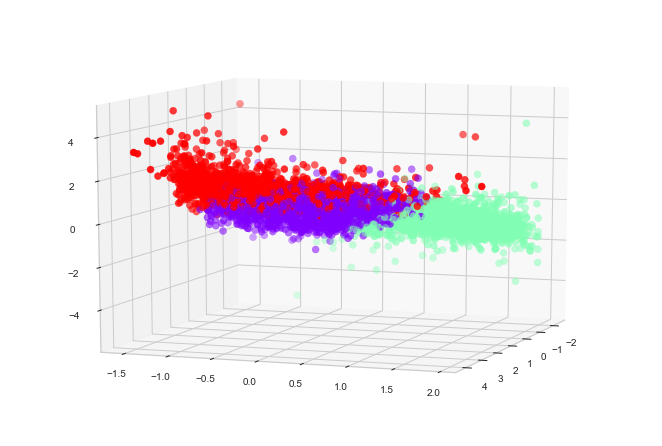

In [190]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfm_norm.iloc[:,1],rfm_norm.iloc[:,0],rfm_norm.iloc[:,2], c=model3.labels_, s = 50, cmap = "rainbow")
centers = model3.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='yellow', s=150)
ax.view_init(10, 20);

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

### iv. Assign the Label

In [110]:
cluster_labels5 = model5.labels_
rfm_k5 = df_rfm.assign(Cluster=cluster_labels5)
rfm_k5.sample(5)

,Recency,Frequency,Monetary,R,F,M,RFM_Scores,RFM_Sum,RFM_Level,Cluster
CustomerID,,,,,,,,,,
16063,282,23,335.32,1,2,2,122,5,Low,2
12942,153,75,683.90,2,3,3,233,8,Middle,4
18069,48,470,2036.67,3,4,4,344,11,Top Class,0
16525,24,183,13027.45,4,4,4,444,12,Top Class,0
15237,23,99,1412.32,4,3,3,433,10,High,3


In [111]:
grouped5 = rfm_k5.groupby(['Cluster'])
avg_df5=grouped5.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)
avg_df5

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          40.4     309.4   7077.6   681
1          64.5      17.3    319.7   732
2         261.9      13.2    247.9   759
3          45.5      77.0   1140.0   989
4         167.7      59.0   1235.5   760

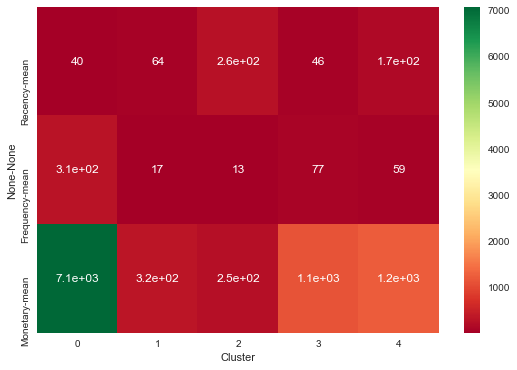

In [112]:
sns.heatmap(avg_df5.iloc[:,:-1].T, cmap="RdYlGn", annot=True);

### Success of Clustering with k=3

In [113]:
cluster_labels3 = model3.labels_
rfm_k3 = df_rfm3.assign(Cluster=cluster_labels3)
rfm_k3.sample(5)

,Recency,Frequency,Monetary,R,F,M,RFM_Scores,RFM_Sum,RFM_Level,Cluster
CustomerID,,,,,,,,,,
13411,129,18,213.55,2,2,1,221,5,Low,1
17591,95,166,2225.97,2,4,4,244,10,High,2
16805,195,98,460.59,1,3,2,132,6,Low,1
12995,107,3,211.32,2,1,1,211,4,Low,1
13772,55,177,1132.13,3,4,3,343,10,High,2


In [114]:
grouped3 = rfm_k3.groupby(['Cluster'])
avg_df3=grouped3.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)
avg_df3

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          67.4      37.4    624.2  1473
1         240.1      21.3    419.4  1169
2          51.6     214.5   4612.0  1279

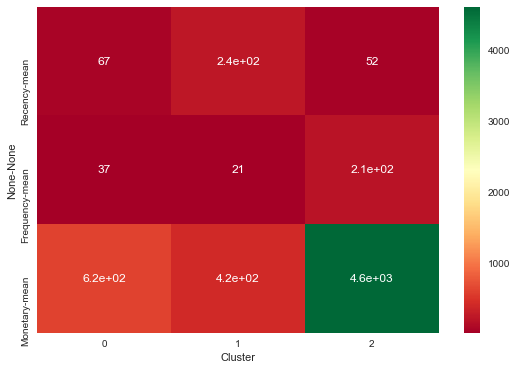

In [115]:
sns.heatmap(avg_df3.iloc[:,:-1].T, cmap="RdYlGn", annot=True);

In [116]:
def rfm_level3(df):
    if df['RFM_Sum'] >9:
        return 'Platinum'
    elif df['RFM_Sum'] >5:
        return "Gold" 
    else:
        return 'Silver'

rfm_k3['RFM_Segment'] = rfm_k3.apply(rfm_level3, axis=1)

In [117]:
rfm_k3.groupby("Cluster")["RFM_Level"].value_counts()

Cluster  RFM_Level
0        Middle        912
         Low           499
         High           62
1        Low          1099
         Middle         70
2        High         1078
         Middle        199
         Low             2
Name: RFM_Level, dtype: int64

In [118]:
# According to RFM_Level
cluster1= rfm_k3[(rfm_k3["RFM_Level"]=="Low") & (rfm_k3.Cluster==1)].Recency.count()/rfm_k3[rfm_k3.Cluster==1].Recency.count()
cluster2= rfm_k3[(rfm_k3["RFM_Level"]=="Middle") & (rfm_k3.Cluster==2)].Recency.count()/rfm_k3[rfm_k3.Cluster==2].Recency.count()
cluster0= rfm_k3[(rfm_k3["RFM_Level"]=="High") & (rfm_k3.Cluster==0)].Recency.count()/rfm_k3[rfm_k3.Cluster==0].Recency.count()

print('According to RFM_Level:')
print("clustering success for cluster0 is {:.2f} \n clustering success for cluster1 is {:.2f}\n clustering success for cluster2 is {:.2f}".format(cluster0, cluster1, cluster2))

According to RFM_Level:
clustering success for cluster0 is 0.04 
 clustering success for cluster1 is 0.94
 clustering success for cluster2 is 0.16


In [119]:
rfm_k3.groupby("Cluster")["RFM_Segment"].value_counts()

Cluster  RFM_Segment
0        Gold           1205
         Silver          206
         Platinum         62
1        Silver          969
         Gold            200
2        Platinum       1078
         Gold            201
Name: RFM_Segment, dtype: int64

In [120]:
cluster1= rfm_k3[(rfm_k3["RFM_Segment"]=="Silver") & (rfm_k3.Cluster==1)].Recency.count()/rfm_k3[rfm_k3.Cluster==1].Recency.count()
cluster2= rfm_k3[(rfm_k3["RFM_Segment"]=="Gold") & (rfm_k3.Cluster==2)].Recency.count()/rfm_k3[rfm_k3.Cluster==2].Recency.count()
cluster0= rfm_k3[(rfm_k3["RFM_Segment"]=="Platinum") & (rfm_k3.Cluster==0)].Recency.count()/rfm_k3[rfm_k3.Cluster==0].Recency.count()

print('According to RFM_Segment:')
print("clustering success for cluster0 is {:.2f} \n clustering success for cluster1 is {:.2f}\n clustering success for cluster2 is {:.2f}".format(cluster0, cluster1, cluster2))

According to RFM_Segment:
clustering success for cluster0 is 0.04 
 clustering success for cluster1 is 0.83
 clustering success for cluster2 is 0.16


### Success of Clustering with k=5

In [121]:
def rfm_level5(df):
    if df['RFM_Sum'] >10:
        return 'Platinum'
    elif df['RFM_Sum'] >8:
        return "Gold" 
    elif df['RFM_Sum'] >6:
        return "Silver" 
    elif df['RFM_Sum'] >4:
        return "Eco Plus" 
    else:
        return 'Economy'

rfm_k5['RFM_Segment'] = rfm_k5.apply(rfm_level5, axis=1)

In [122]:
rfm_k5.groupby("Cluster")["RFM_Segment"].value_counts()

Cluster  RFM_Segment
0        Platinum       592
         Gold            89
1        Eco Plus       430
         Silver         194
         Economy        106
         Gold             2
2        Economy        595
         Eco Plus       164
3        Gold           575
         Silver         251
         Platinum       162
         Eco Plus         1
4        Silver         356
         Eco Plus       300
         Gold           100
         Economy          4
Name: RFM_Segment, dtype: int64

In [123]:
cluster1= rfm_k5[(rfm_k5["RFM_Segment"]=="Platinum") & (rfm_k5.Cluster==1)].Recency.count()/rfm_k5[rfm_k5.Cluster==1].Recency.count()
cluster2= rfm_k5[(rfm_k5["RFM_Segment"]=="Economy") & (rfm_k5.Cluster==2)].Recency.count()/rfm_k5[rfm_k5.Cluster==2].Recency.count()
cluster0= rfm_k5[(rfm_k5["RFM_Segment"]=="Silver") & (rfm_k5.Cluster==0)].Recency.count()/rfm_k5[rfm_k5.Cluster==0].Recency.count()
cluster3= rfm_k5[(rfm_k5["RFM_Segment"]=="Gold") & (rfm_k5.Cluster==3)].Recency.count()/rfm_k5[rfm_k5.Cluster==3].Recency.count()
cluster4= rfm_k5[(rfm_k5["RFM_Segment"]=="Eco Plus") & (rfm_k5.Cluster==4)].Recency.count()/rfm_k5[rfm_k5.Cluster==4].Recency.count()

print("clustering success for cluster0 is {:.2f} \n clustering success for cluster1 is {:.2f}\n clustering success for cluster2 is {:.2f} \n clustering success for cluster3 is {:.2f} \n clustering success for cluster4 is {:.2f}".format(cluster0, cluster1, cluster2,cluster3, cluster4))

clustering success for cluster0 is 0.00 
 clustering success for cluster1 is 0.00
 clustering success for cluster2 is 0.78 
 clustering success for cluster3 is 0.58 
 clustering success for cluster4 is 0.39


In [124]:
rfm_k5.groupby("Cluster")["RFM_Level"].value_counts()

Cluster  RFM_Level
0        Top Class    592
         High          89
1        Low          302
         Mid Low      234
         Middle       194
         High           2
2        Low          748
         Mid Low       11
3        High         575
         Middle       251
         Top Class    162
         Mid Low        1
4        Middle       356
         Mid Low      179
         Low          125
         High         100
Name: RFM_Level, dtype: int64

In [125]:
cluster1= rfm_k5[(rfm_k5["RFM_Level"]=="Top Class") & (rfm_k5.Cluster==1)].Recency.count()/rfm_k5[rfm_k5.Cluster==1].Recency.count()
cluster2= rfm_k5[(rfm_k5["RFM_Level"]=="Low") & (rfm_k5.Cluster==2)].Recency.count()/rfm_k5[rfm_k5.Cluster==2].Recency.count()
cluster0= rfm_k5[(rfm_k5["RFM_Level"]=="Middle") & (rfm_k5.Cluster==0)].Recency.count()/rfm_k5[rfm_k5.Cluster==0].Recency.count()
cluster3= rfm_k5[(rfm_k5["RFM_Level"]=="High") & (rfm_k5.Cluster==3)].Recency.count()/rfm_k5[rfm_k5.Cluster==3].Recency.count()
cluster4= rfm_k5[(rfm_k5["RFM_Level"]=="Mid Low") & (rfm_k5.Cluster==4)].Recency.count()/rfm_k5[rfm_k5.Cluster==4].Recency.count()

print("clustering success for cluster0 is {:.2f} \n clustering success for cluster1 is {:.2f}\n clustering success for cluster2 is {:.2f} \n clustering success for cluster3 is {:.2f} \n clustering success for cluster4 is {:.2f}".format(cluster0, cluster1, cluster2,cluster3, cluster4))

clustering success for cluster0 is 0.00 
 clustering success for cluster1 is 0.00
 clustering success for cluster2 is 0.99 
 clustering success for cluster3 is 0.58 
 clustering success for cluster4 is 0.24


#### k=5 did not result in good scores. With k=3 scores are obviously higher

In [126]:
rfm_k3.groupby("Cluster")["RFM_Level"].value_counts()

Cluster  RFM_Level
0        Middle        912
         Low           499
         High           62
1        Low          1099
         Middle         70
2        High         1078
         Middle        199
         Low             2
Name: RFM_Level, dtype: int64

In [127]:
c1 = rfm_k3[rfm_k3.Cluster==1].Recency.count()
c2 = rfm_k3[rfm_k3.Cluster==2].Recency.count()
c0 = rfm_k3[rfm_k3.Cluster==0].Recency.count()

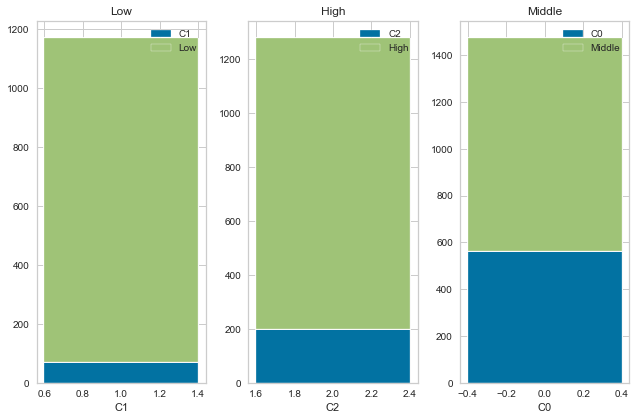

In [128]:
fig,ax=plt.subplots(1,3, figsize=(9,6))
ax[0].bar(rfm_k3[rfm_k3.Cluster==1].Cluster, c1-1098, label="C1")
ax[0].bar(rfm_k3[rfm_k3.Cluster==1].Cluster, 1098, bottom=c1-1098, label="Low")
ax[0].legend(loc="best")
ax[0].set_xlabel("C1")
ax[0].set_title("Low")

ax[1].bar(rfm_k3[rfm_k3.Cluster==2].Cluster, c2-1079, label="C2")
ax[1].bar(rfm_k3[rfm_k3.Cluster==2].Cluster, 1079, bottom=c2-1079, label="High")
ax[1].legend(loc="best")
ax[1].set_xlabel("C2")
ax[1].set_title("High")

ax[2].bar(rfm_k3[rfm_k3.Cluster==0].Cluster, c0-912, label="C0")
ax[2].bar(rfm_k3[rfm_k3.Cluster==0].Cluster, 912, bottom=c0-912, label="Middle")
ax[2].legend(loc="best")
ax[2].set_xlabel("C0")
ax[2].set_title("Middle")
plt.tight_layout();

In [129]:
rfm_norm = rfm_norm.assign(Cluster=cluster_labels3)
df_melt = pd.melt(rfm_norm.reset_index(), 
                        
                    id_vars=['CustomerID', 'Cluster'],

                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                        
                    value_name='Value', var_name='Metric')
print(df_melt.sample(5))

       CustomerID  Cluster     Metric     Value
8316        13481        2   Monetary  0.764696
10606       16680        0   Monetary -1.062537
7707        18105        0  Frequency -0.615691
9030        14499        2   Monetary  0.128485
5899        15594        2  Frequency  0.732685


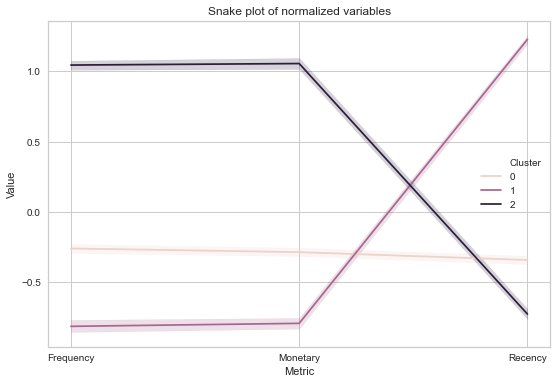

In [130]:
plt.title('Snake plot of normalized variables')
plt.xlabel("Metric")
plt.ylabel("Value")

sns.lineplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [131]:
cluster_avg = rfm_k3.drop(['R', 'F', 'M', 'RFM_Scores', 'RFM_Level', 'RFM_Segment'], axis=1).groupby(['Cluster']).mean() 
population_avg = df_rfm.drop(['R', 'F', 'M', 'RFM_Scores', 'RFM_Level'], axis=1).mean()

relative_imp = cluster_avg / population_avg

print(relative_imp.round(3))

         Recency  Frequency  Monetary  RFM_Sum
Cluster                                       
0          0.593      0.414     0.335    0.956
1          2.111      0.235     0.225    0.585
2          0.453      2.374     2.474    1.431


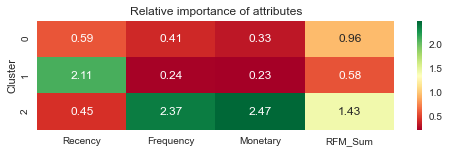

In [132]:
plt.figure(figsize=(8,2))

plt.title('Relative importance of attributes')

sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

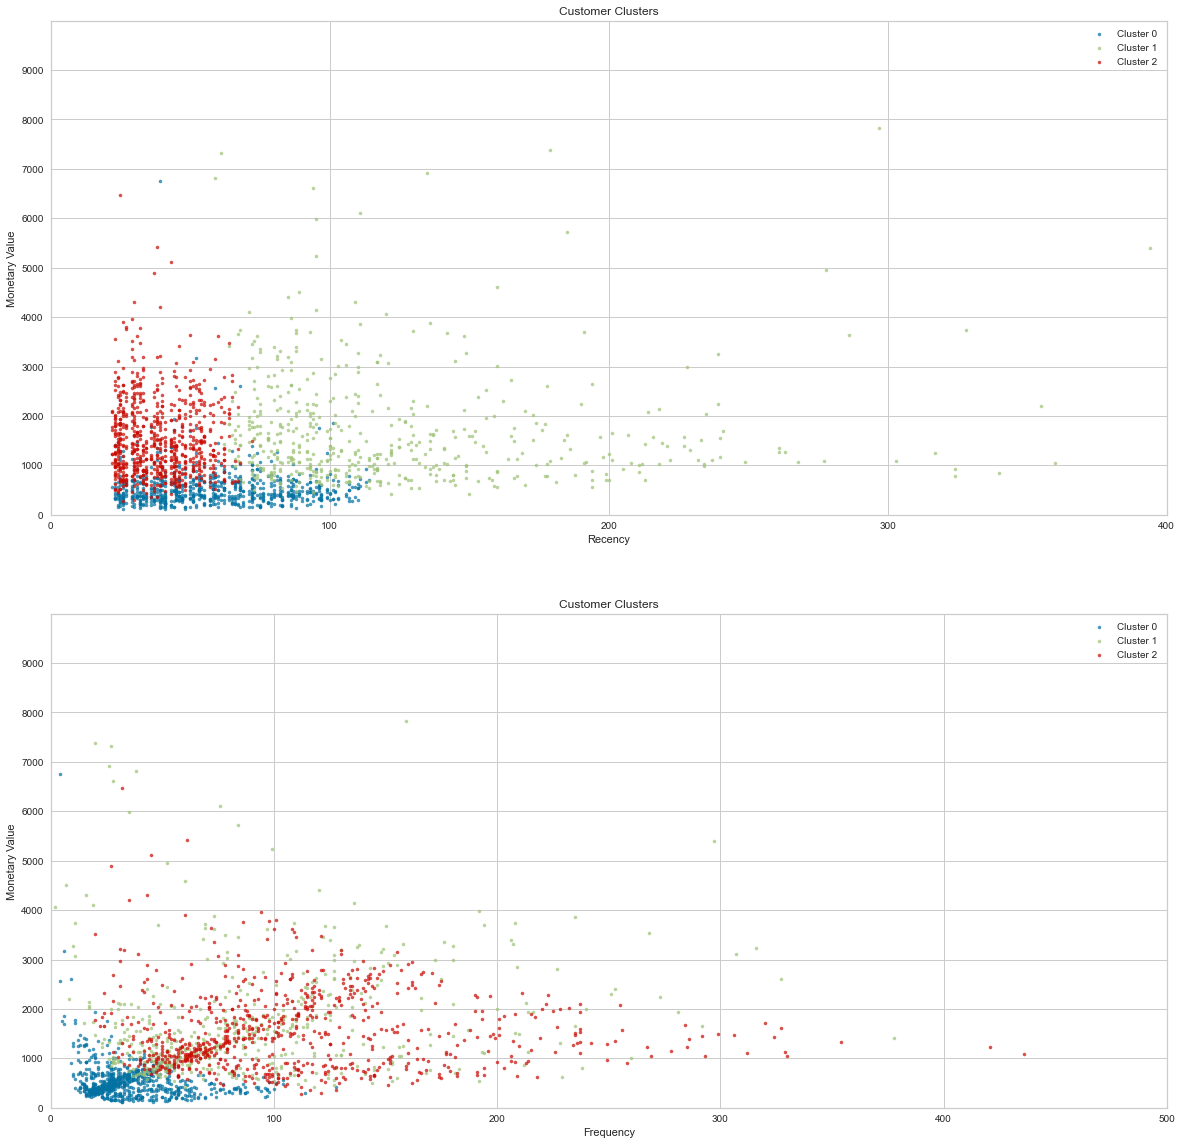

In [133]:
# Plot RFM distributions
plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1);
plt.scatter(rfm_k3[cluster_labels == 0].loc[:,'Recency'], rfm_k3[cluster_labels == 0].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 0', alpha=0.7)
plt.scatter(rfm_k3[cluster_labels == 1].loc[:,'Recency'], rfm_k3[cluster_labels == 1].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 1', alpha=0.7)
plt.scatter(rfm_k3[cluster_labels == 2].loc[:,'Recency'], rfm_k3[cluster_labels == 2].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 2', alpha=0.7)

plt.xticks(np.arange(0, 1000, 100)) 
plt.yticks(np.arange(0, 10000, 1000))
axes = plt.gca()
axes.set_xlim(0, 400)
axes.set_ylim(0, 10000)
plt.title('Customer Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend()
plt.subplot(2, 1, 2);
plt.scatter(rfm_k3[cluster_labels == 0].loc[:,'Frequency'], rfm_k3[cluster_labels == 0].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 0', alpha=0.7)
plt.scatter(rfm_k3[cluster_labels == 1].loc[:,'Frequency'], rfm_k3[cluster_labels == 1].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 1', alpha=0.7)
plt.scatter(rfm_k3[cluster_labels == 2].loc[:,'Frequency'], rfm_k3[cluster_labels == 2].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 2', alpha=0.7)

plt.xticks(np.arange(0, 1000, 100)) 
plt.yticks(np.arange(0, 10000, 1000))
axes = plt.gca()
axes.set_xlim(0, 500)
axes.set_ylim(0, 10000)
plt.title('Customer Clusters')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend();

**Conclusion**

- Cluster 2 : The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=4), frequent buyers (F=4), and spent the most (M=4)

- Cluster 0 : Second cluster can be interpreted as passer customers as their last purchase is long ago (R<=1),purchased very few (F>=2 & F < 4) and spent little (M>=4 & M < 4).Company has to come up with new strategies to make them permanent members. Low value customers
- Cluster 1 : The third cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time(R=1), but used to purchase frequently and spent a lot.